**For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.**
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
- A Decision Tree is a type of supervised machine learning used to categorize or make predictions based on how a previous     set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested   on a set of data that contains the desired categorization.

## Step 1 - Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Step 2 - Load Dataset to Python Environment

In [2]:
iris = datasets.load_iris()

In [3]:
data=pd.DataFrame(iris['data'],columns=["petal_length","petal_width","sepal_length","sepal_width"])
data['species']=iris['target']
data.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step 3 - Exploratory Data Analysis

In [4]:
# Returns number of rows and columns of dataset
data.shape

(150, 5)

In [5]:
# Returns information about count of values in each column,null values, datatypes and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
# Returns statistical summary about data
data.describe()

,petal_length,petal_width,sepal_length,sepal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Checks whether data contains any null values
data.isnull().sum()

petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
species         0
dtype: int64

- There are no missing values in the dataset.

## Count plot of Target variable

In [8]:
data['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

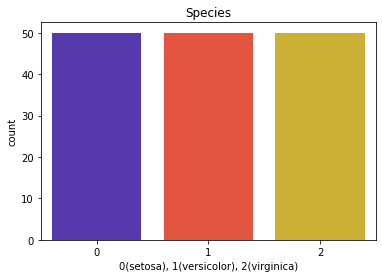

In [9]:
sns.countplot(x='species',data=data, palette='CMRmap')
plt.title("Species")
plt.xlabel('0(setosa), 1(versicolor), 2(virginica)')
plt.show() 

- From the count plot above, it is understood that the dataset is balanced.

## Step 4 - Splitting Features and Target

In [10]:
x = data.drop(['species'], axis = 1)
y = data['species']

## Step 5 - Decision Tree Model Training

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
dtree = DecisionTreeClassifier(random_state=12)
model = dtree.fit(x_train,y_train)
ypred = model.predict(x_test)
print(classification_report(y_test,ypred))
print('Accuracy score is:',accuracy_score(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy score is: 1.0


## Step 6 - Comparing Actual and Predicted Classification

In [13]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': ypred}) 
data.head(15)

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


## Step 7 - Visualizing the Decision Tree

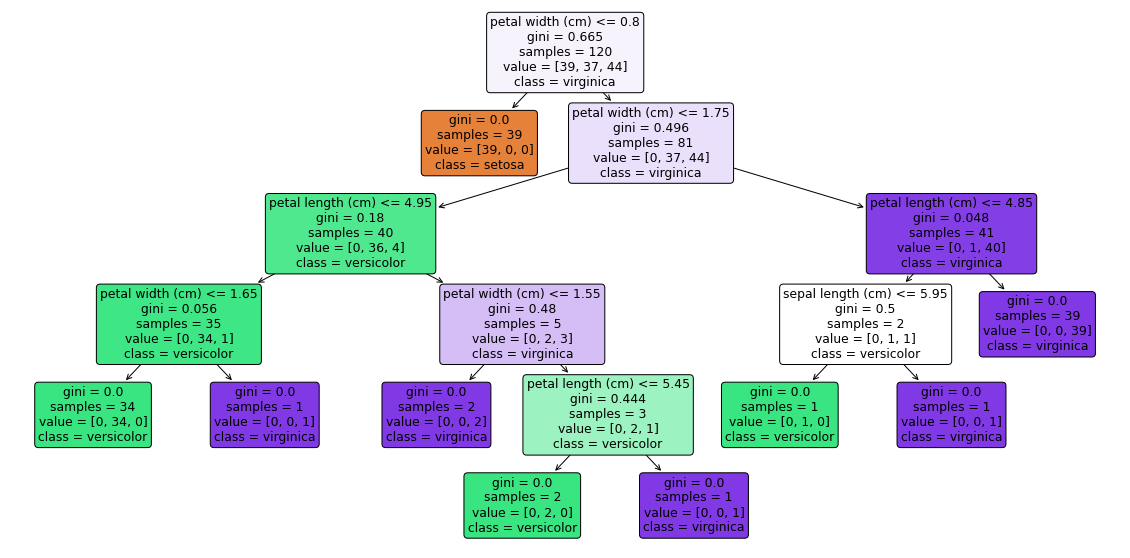

In [14]:
plt.figure(figsize=(20,10))
tree.plot_tree(model,
               feature_names = iris.feature_names,  
               class_names = iris.target_names,
               rounded=True,filled=True)
plt.show()

### Step 8 - Predicting the class output for some random values of petal and sepal length and width

In [15]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm \
      and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ', model.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.
